In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    mean_absolute_error
)
from sklearn.linear_model import LinearRegression

data = loadmat('./traffic_dataset.mat') 

X_train_raw = data['tra_X_tr'][0]  # 1x1261 array of matrices
X_test_raw = data['tra_X_te'][0]  # 1x840 array of matrices

# Function to convert arrays of matrices into a 2D numpy array 
def flatten_matrices(matrices):
    flattened = np.array([mat.toarray().flatten() for mat in matrices])
    return flattened

# Flattening the input matrices
# Note that X_train_raw and X_test_raw need to be arrays of scipy sparse matrices
X_train_flattened = flatten_matrices(X_train_raw)
X_test_flattened = flatten_matrices(X_test_raw)

# Aggregate traffic data across all locations for each quarter-hour
y_train_aggregated = np.sum(data['tra_Y_tr'], axis=0)
y_test_aggregated = np.sum(data['tra_Y_te'], axis=0)

print("Shape of y_train_aggregated:", y_train_aggregated.shape)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_flattened, y_train_aggregated, test_size=0.2, random_state=42
)

Shape of y_train_aggregated: (1261,)


Linear Regression - RMSE: 0.6376319004816134, R²: 0.9847844492599948, MAE: 0.47330948199562384


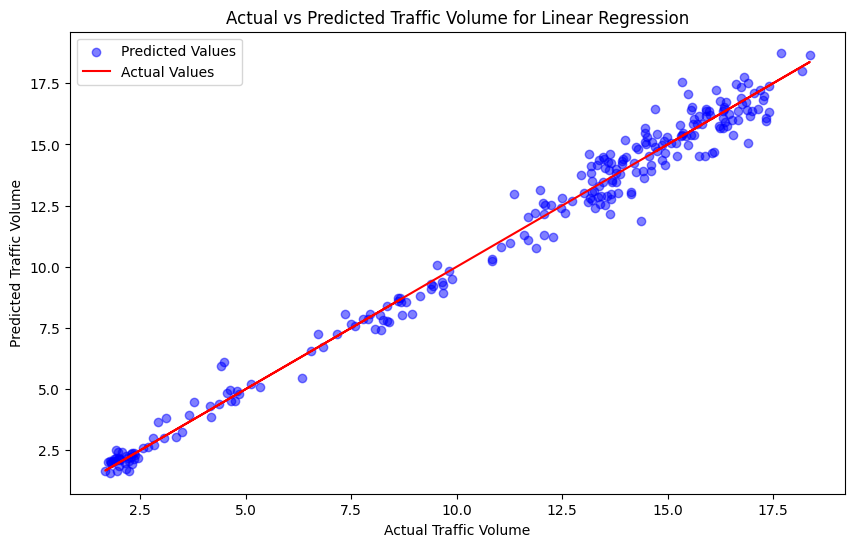

In [30]:

# Train a linear regression model for benchmarking
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_val)

# Evaluate the linear regression model
linear_rmse = np.sqrt(mean_squared_error(y_val, linear_predictions))
linear_r2 = r2_score(y_val, linear_predictions)
linear_mae = mean_absolute_error(y_val, linear_predictions)

print(f"Linear Regression - RMSE: {linear_rmse}, R²: {linear_r2}, MAE: {linear_mae}")

# Plotting actual vs predicted values for the linear regression model
plt.figure(figsize=(10, 6))
plt.scatter(y_val, linear_predictions, color='blue', label='Predicted Values', alpha=0.5)
plt.plot(y_val, y_val, color='red', label='Actual Values')  # This line represents the perfect predictions
plt.title('Actual vs Predicted Traffic Volume for Linear Regression')
plt.xlabel('Actual Traffic Volume')
plt.ylabel('Predicted Traffic Volume')
plt.legend()
plt.show()


Training RMSE: 0.21335288518886555
Validation RMSE: 0.5445370386482217
Training R²: 0.9982909449594574
Validation R²: 0.9889030800287015
Training MAE: 0.14559048397500082
Validation MAE: 0.38065914306232745
Actual vs Predicted sample:
 [[14.74217655 15.36472209]
 [15.29845866 15.00799626]
 [15.55768333 15.73850537]
 [13.34189631 12.95922933]
 [14.45305932 14.01130313]
 [13.6627744  13.62777207]
 [ 7.59318076  7.80479682]
 [16.31247081 16.3955348 ]
 [15.70294255 15.85910322]
 [17.14946287 16.41264362]
 [ 7.35497431  7.48352639]
 [13.63428305 14.45440915]
 [12.045773   13.81735638]
 [15.61186362 16.42019617]
 [14.19850537 14.54328818]
 [ 2.0294255   2.18585708]
 [17.40681924 16.79845399]
 [17.68939748 17.43364783]
 [13.16487623 13.28928071]
 [ 3.66884633  3.70436712]]
Actual traffic volume: 14.742176553012609
Predicted traffic volume: 15.36

Top 5 important features for the prediction:
Feature index 9: Volume_10 from Sensor 0, Importance: 0.3350
Feature index 1400: Volume_9 from Sensor 2

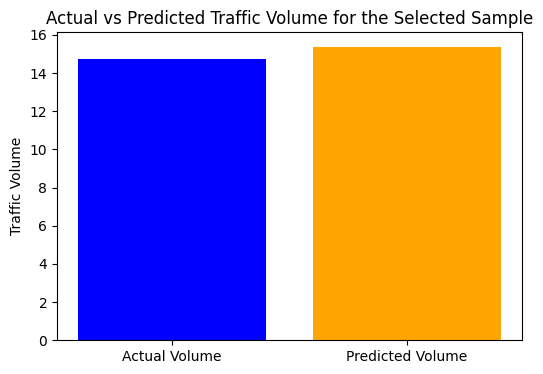

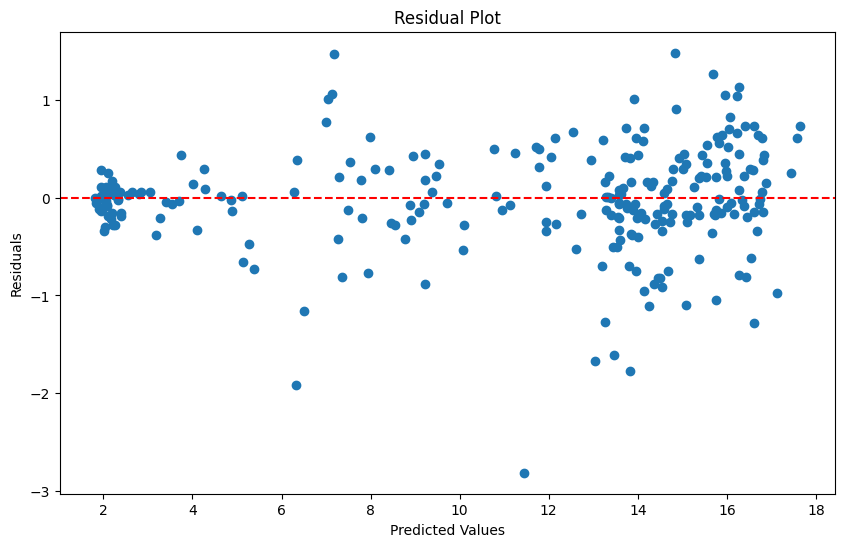

Feature index 9 corresponds to Sensor 0, Feature: Volume_10
Feature index 1400 corresponds to Sensor 29, Feature: Volume_9
Feature index 1688 corresponds to Sensor 35, Feature: Volume_9
Feature index 8 corresponds to Sensor 0, Feature: Volume_9
Feature index 681 corresponds to Sensor 14, Feature: Volume_10
Feature index 1687 corresponds to Sensor 35, Feature: Volume_8
Feature index 1399 corresponds to Sensor 29, Feature: Volume_8
Feature index 57 corresponds to Sensor 1, Feature: Volume_10
Feature index 1209 corresponds to Sensor 25, Feature: Volume_10
Feature index 583 corresponds to Sensor 12, Feature: Volume_8
Feature index 1401 corresponds to Sensor 29, Feature: Volume_10
Feature index 680 corresponds to Sensor 14, Feature: Volume_9
Feature index 391 corresponds to Sensor 8, Feature: Volume_8
Feature index 967 corresponds to Sensor 20, Feature: Volume_8
Feature index 633 corresponds to Sensor 13, Feature: Volume_10
Feature index 1689 corresponds to Sensor 35, Feature: Volume_10
Fea

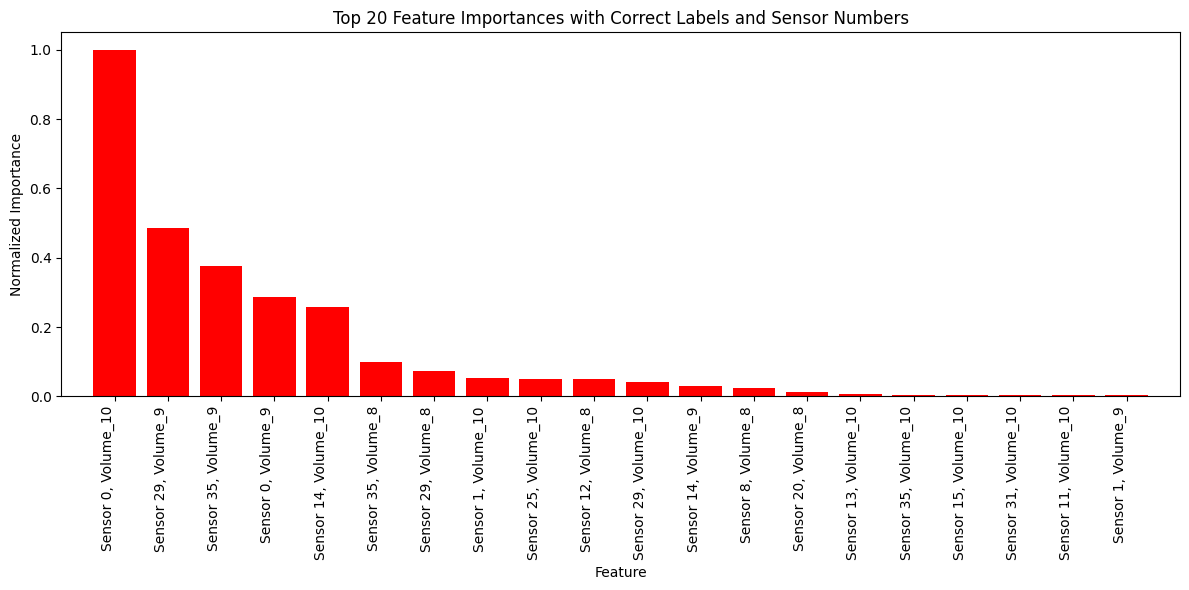

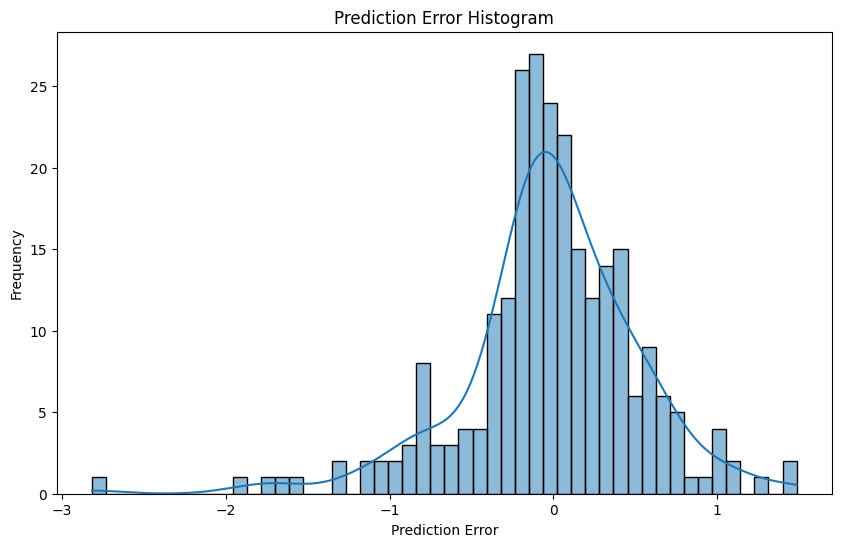

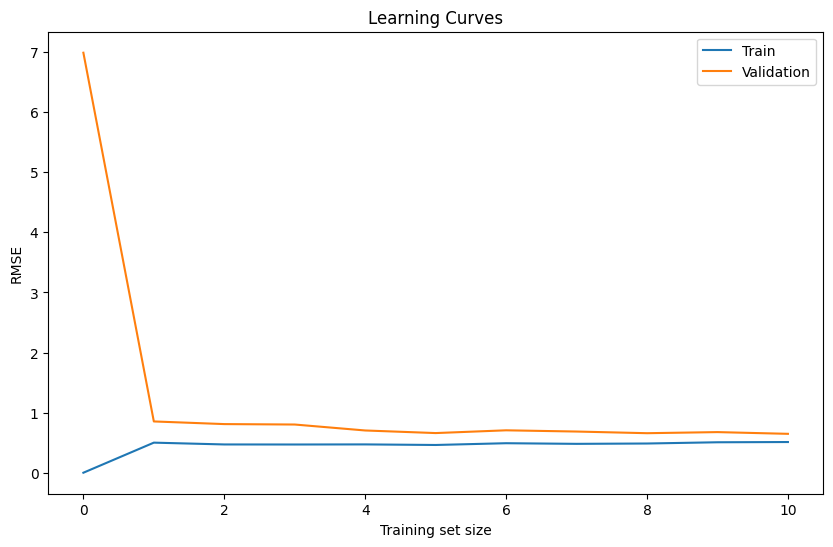

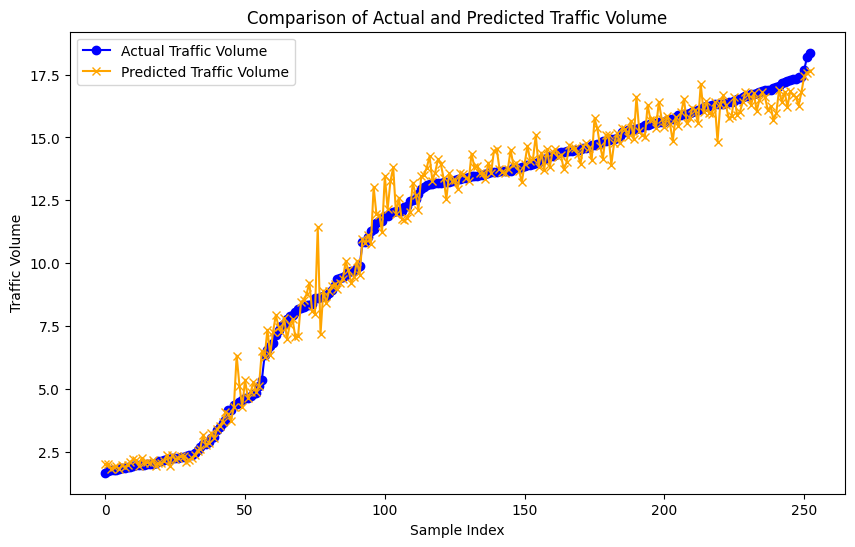

In [31]:
# Function to get feature description based on index
def get_feature_description(feature_index):
    # Total number of features per location
    features_per_location = 48

    feature_names = (
        [f'Volume_{i}' for i in range(1, 11)] + 
        [f'Weekday_{i}' for i in range(7)] + 
        [f'Hour_{i}' for i in range(24)] + 
        [f'Direction_{i}' for i in range(4)] + 
        ['Number_of_Lanes'] + 
        ['Road_Name']
    )

    # Calculate sensor number and normalized feature index
    sensor_number = feature_index // features_per_location
    feature_index_normalized = feature_index % features_per_location

    # Return a tuple of the sensor number and the feature name
    return sensor_number, feature_names[feature_index_normalized]

# Random Forest model with the correctly shaped data
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
predictions_train = model.predict(X_train)
predictions_val = model.predict(X_val)

# Calculate evaluation metrics 
rmse_train = np.sqrt(mean_squared_error(y_train, predictions_train))
rmse_val = np.sqrt(mean_squared_error(y_val, predictions_val))
r2_train = r2_score(y_train, predictions_train)
r2_val = r2_score(y_val, predictions_val)

# Output the evaluation metrics
print(f'Training RMSE: {rmse_train}')
print(f'Validation RMSE: {rmse_val}')
print(f'Training R²: {r2_train}')
print(f'Validation R²: {r2_val}')

# Output additional evaluation metrics
mae_train = mean_absolute_error(y_train, predictions_train)
mae_val = mean_absolute_error(y_val, predictions_val)

print(f'Training MAE: {mae_train}')
print(f'Validation MAE: {mae_val}')


# Output actual vs predicted values 
sample_size = 20  
actual_vs_predicted = np.column_stack((y_val[:sample_size], predictions_val[:sample_size]))
print("Actual vs Predicted sample:\n", actual_vs_predicted)

# Make a single prediction for a chosen sample 
sample_index = 0  
sample_features = X_val[sample_index]
sample_true_volume = y_val[sample_index]
sample_prediction = model.predict([sample_features])[0]

# Identify the most important features
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

# Taking the top 5 most important features
top_k = 5
top_features_indices = sorted_indices[:top_k]
top_features_importances = importances[top_features_indices]
top_features_names = [get_feature_description(i) for i in top_features_indices]

# Print the actual vs predicted volume
print(f"Actual traffic volume: {sample_true_volume}")
print(f"Predicted traffic volume: {sample_prediction:.2f}")

print("\nTop 5 important features for the prediction:")
for idx, imp, name in zip(top_features_indices, top_features_importances, top_features_names):
    print(f"Feature index {idx}: {name[1]} from Sensor {name[0]}, Importance: {imp:.4f}")

# Plot the actual vs predicted values
plt.figure(figsize=(6, 4))
plt.bar(['Actual Volume', 'Predicted Volume'], [sample_true_volume, sample_prediction], color=['blue', 'orange'])
plt.ylabel('Traffic Volume')
plt.title('Actual vs Predicted Traffic Volume for the Selected Sample')
plt.show()

# Calculate residuals for the validation set
residuals = y_val - predictions_val

# Plotting Residuals against actual values
plt.figure(figsize=(10, 6))
plt.scatter(predictions_val, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Plotting Feature Importances
feature_importances_normalized = model.feature_importances_ / np.max(model.feature_importances_)

# Get the indices of the features sorted by importance
sorted_idx = np.argsort(feature_importances_normalized)[::-1]

# Select a subset of the most important features 
top_n = 20
sorted_idx_subset = sorted_idx[:top_n]
importances_subset = feature_importances_normalized[sorted_idx_subset]

# Map the sorted indices to feature labels 
for i in sorted_idx_subset:
    sensor_number, feature_description = get_feature_description(i)
    print(f"Feature index {i} corresponds to Sensor {sensor_number}, Feature: {feature_description}")

# Create labels for plotting including sensor number
sorted_feature_labels = [f"Sensor {get_feature_description(i)[0]}, {get_feature_description(i)[1]}" for i in sorted_idx_subset]

# Generate the feature importance graph
plt.figure(figsize=(12, 6))
plt.bar(range(top_n), importances_subset, color="r", align="center")
plt.xticks(range(top_n), sorted_feature_labels, rotation=90, ha='right')
plt.xlim([-1, top_n])
plt.xlabel('Feature')
plt.ylabel('Normalized Importance')
plt.title('Top 20 Feature Importances with Correct Labels and Sensor Numbers')
plt.tight_layout()  
plt.show()

# Plotting Prediction Error Histogram
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=50, kde=True)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Prediction Error Histogram')
plt.show()

# Plotting the Learning Curves
train_errors, val_errors = [], []
step_size = len(X_train) // 10  # Incremental step size for training
for m in range(1, len(X_train), step_size):
    model = RandomForestRegressor(n_estimators=10, max_depth=5, random_state=42)  # More simplistic model
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

plt.figure(figsize=(10, 6))
plt.plot(np.sqrt(train_errors), label='Train')
plt.plot(np.sqrt(val_errors), label='Validation')
plt.xlabel('Training set size')
plt.ylabel('RMSE')
plt.title('Learning Curves')
plt.legend()
plt.show()

sample_size = len(y_val)
indices = np.random.choice(range(len(y_val)), size=sample_size, replace=False)

# Obtain actual and predicted values for the chosen indices
actual_sample = y_val[indices]
predicted_sample = predictions_val[indices]

# Sorting the samples by the actual values for a more coherent plot
sorted_indices = np.argsort(actual_sample)
actual_sample_sorted = actual_sample[sorted_indices]
predicted_sample_sorted = predicted_sample[sorted_indices]

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(actual_sample_sorted, label='Actual Traffic Volume', color='blue', marker='o')
plt.plot(predicted_sample_sorted, label='Predicted Traffic Volume', color='orange', marker='x')
plt.title('Comparison of Actual and Predicted Traffic Volume')
plt.xlabel('Sample Index')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()


In [35]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

# Predict and evaluate using the best estimator
predictions_val = best_rf.predict(X_val)
rmse_val = np.sqrt(mean_squared_error(y_val, predictions_val))
r2_val = r2_score(y_val, predictions_val)

# Print the best parameters and evaluation metrics
print(f"Best parameters: {best_params}")
print(f"Validation RMSE: {rmse_val}")
print(f"Validation R²: {r2_val}")


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Validation RMSE: 0.5407299373994221
Validation R²: 0.9890577046391242


# Traffic Volume Prediction Project Report

## Introduction
This project aimed to develop a machine learning model for predicting traffic volume at a given sensor. The project utilizes a dataset consisting of a sparse matrix representing features for different sensors at various times.

## Dataset Description
The dataset provided consists of a sparse matrix where each row corresponds to one sensor's data at a specific time, with 48 features in total. The features include historical traffic volume measurements, weekday indicators, hour of the day indicators, road direction indicators, number of lanes, and road names. The lack of labels in the dataset presented a significant challenge as it required aggregating sensor data to calculate the total traffic volume for each time interval.

## Methodology
### Data Preprocessing
The dataset was preprocessed by converting the sparse matrix representation into a dense format to facilitate model training. Features and labels were extracted from the dataset, and labels were obtained by aggregating sensor data to calculate the total traffic volume.

### Model Selection
Three different models were selected for traffic volume prediction:
1. **Linear Regression**
2. **Random Forest (Default)**
3. **Random Forest (Tuned)**

## Model Performance
### Linear Regression
- **RMSE:** 0.6376
- **R²:** 0.9848
- **MAE:** 0.4733

### Random Forest (Default)
- **Training RMSE:** 0.2134
- **Validation RMSE:** 0.5445
- **Training R²:** 0.9983
- **Validation R²:** 0.9889
- **Training MAE:** 0.1456
- **Validation MAE:** 0.3807

### Random Forest (Tuned)
- **Best Parameters:** {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
- **Validation RMSE:** 0.5407
- **Validation R²:** 0.9891

## Model Comparison
- **Linear Regression:** Provides a baseline model with decent performance but struggles to capture nonlinear relationships present in the data.
- **Random Forest (Default):** Demonstrates impressive performance on the training set but shows slight overfitting on the validation set.
- **Random Forest (Tuned):** Achieves improved performance on the validation set after hyperparameter tuning, indicating enhanced generalization ability.

## Challenges and Findings
- **Label Acquisition:** The lack of labels in the dataset presented a challenge, requiring aggregation of sensor data to calculate total traffic volume for each time interval.
- **Model Performance:** Random Forest models, especially when tuned appropriately, offer superior predictive accuracy compared to linear regression. The tuned Random Forest model showed the best overall performance, indicating its robustness and effectiveness for traffic volume prediction tasks.

## Conclusion
The findings of this project provide valuable insights into traffic patterns and can be instrumental in traffic management and urban planning efforts. The tuned Random Forest model emerges as the most effective for traffic volume prediction, offering enhanced predictive accuracy and generalization ability.

